# Iris unsupervised learning using SOM
This example using Self Organizing Maps in order to cluster the Iris data set and then predict the type of Iris plant based on the features of its petals and sepals.

## Import general libs

In [1]:
import numpy as np    
import pandas as pd

## Load the data set

In [2]:
from sklearn import datasets
classes = ['Iris Setosa','Iris Versicolour','Iris Virginica']

iris = datasets.load_iris()
X = iris.data[:, :]
y = iris.target

## StandardScaler transform data set

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

## Interpolate data between 0 and 1 then we can see it in an image

In [3]:
X_train = np.interp(X_train, (X_train.min(), X_train.max()), (0, 1))
X_test = np.interp(X_test, (X_test.min(), X_test.max()), (0, 1))

## SOM Classifier - Create and Train

In [4]:
from mvpa2.suite import *
import matplotlib.pyplot as pl

som = SimpleSOMMapper((20, 30), 100, learning_rate=0.05)
som.train(X_train)

## Plot the result

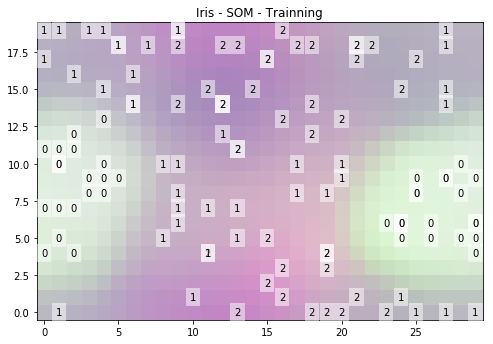

In [5]:
pl.figure(1, figsize=(8, 6))
pl.clf()

pl.title('Iris - SOM - Trainning')
pl.imshow(som.K, origin='lower')

mapped = som(X_train)

for i, m in enumerate(mapped):
    pl.text(m[1], m[0], y_train[i], ha='center', va='center',
           bbox=dict(facecolor='white', alpha=0.5, lw=0))

pl.show()

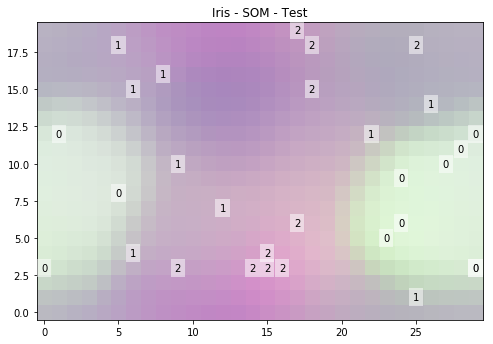

In [6]:
pl.figure(2, figsize=(8, 6))
pl.clf()

pl.imshow(som.K, origin='lower')

mapped = som(X_test)
pl.title('Iris - SOM - Test')

for i, m in enumerate(mapped):
    pl.text(m[1], m[0], y_test[i], ha='center', va='center',
           bbox=dict(facecolor='white', alpha=0.5, lw=0))


pl.show()

In [ ]:
print confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))